In [20]:
from markethistory import MarketHistory
from constants import * 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
from supervised import *
import pandas as pd
import json
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
with open('config.json') as file:
    config = json.load(file)

Example

In [78]:
markethistory = MarketHistory(config)

In [86]:
markethistory.features

['close', 'high', 'low', 'volume', 'ma10', 'ma50', 'ma100', 'ma200', 'std']

In [93]:
features = {'close':0,'ma10':4,'ma200':7}

In [94]:
data,feature_list = data_maker(markethistory.data,features,lookback_window=3,normalization="returns")

In [102]:
params = {'max_depth':8, 'eta':.25, 'silent':1,'alpha':1,'min_child_weight':5, 'objective':"binary:logistic" }

In [103]:
coin_names = markethistory.traded_coins
agent = Agent(data,coin_names,feature_list,num_rounds=5,params=params)

                    BCH    DGB    ETC    ETH    LTC     SC    STR    XEM  \
Training error    0.339  0.353  0.343  0.352  0.354  0.350  0.366  0.364   
Validation error  0.433  0.396  0.453  0.448  0.456  0.399  0.442  0.452   

                    XMR    XRP  reversed_USDT  
Training error    0.350  0.365          0.374  
Validation error  0.445  0.465          0.487  


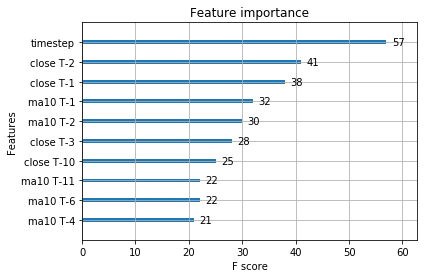

In [101]:
agent.models['SC'].plot_importance()